In [28]:
#Essential libraries for data visualization and Deep learning
import os
import cv2
from random import randint
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

import keras
from keras.preprocessing.image import ImageDataGenerator
from keras import Model, layers

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
from keras.regularizers import l2

In [29]:
DIR = '/Users/neeharikasinha/Documents/datascience-course/CXR2/'
SIZE = 64
TARGET_SIZE = (SIZE, SIZE)

In [30]:

train_datagen = ImageDataGenerator( 
    zoom_range=0.2,
    rotation_range=10,
    horizontal_flip=False,
    rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    DIR + '/train',
    batch_size=100,
    class_mode='categorical',
    target_size=TARGET_SIZE)
 
val_datagen = ImageDataGenerator(rescale=1.0/255)
 
val_generator = val_datagen.flow_from_directory(
    DIR + '/val',
    batch_size=100,
    class_mode='categorical',
    target_size=TARGET_SIZE)

test_datagen = ImageDataGenerator(rescale=1.0/255)

test_generator = test_datagen.flow_from_directory(
    DIR + '/test',
    batch_size=100,
    class_mode='categorical',
    target_size=TARGET_SIZE,shuffle=False)

Found 39148 images belonging to 2 classes.
Found 13059 images belonging to 2 classes.
Found 2297 images belonging to 2 classes.


In [31]:
train_generator.class_indices

{'normal': 0, 'pcardiomegaly': 1}

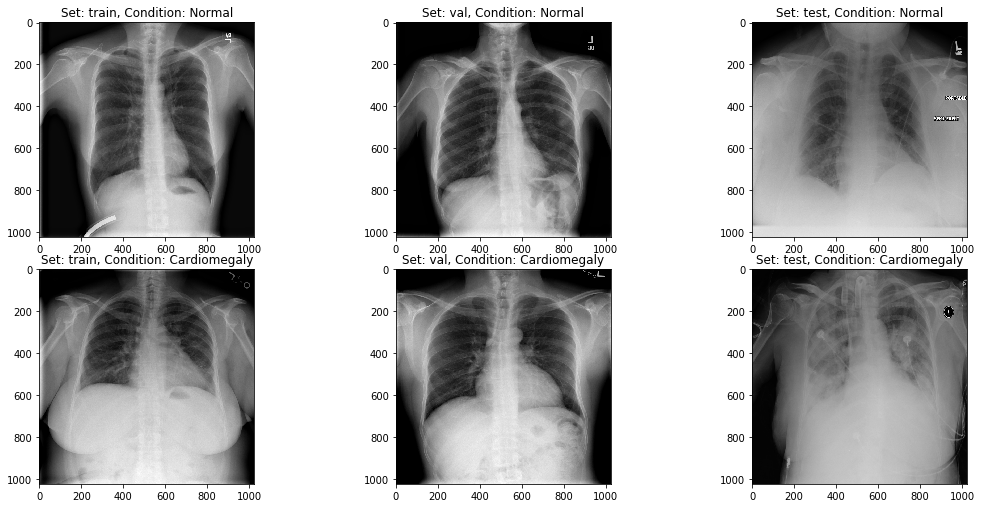

In [32]:
# code to print the images and see if there are any specific visual analysis. 
input_path = '/Users/neeharikasinha/Documents/datascience-course/CXR2/'

fig, ax = plt.subplots(2, 3, figsize=(15, 7))
ax = ax.ravel()
plt.tight_layout()

for i, _set in enumerate(['train', 'val', 'test']):
    set_path = input_path+_set
    ax[i].imshow(plt.imread(set_path+'/normal/'+os.listdir(set_path+'/normal')[0]), cmap='gray')
    ax[i].set_title('Set: {}, Condition: Normal'.format(_set))
    ax[i+3].imshow(plt.imread(set_path+'/pcardiomegaly/'+os.listdir(set_path+'/pcardiomegaly')[0]), cmap='gray')
    ax[i+3].set_title('Set: {}, Condition: Cardiomegaly'.format(_set))

In [33]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3),activation='relu', input_shape=(SIZE, SIZE, 3), name="conv1"))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', name="conv2"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, kernel_size=(3, 3),activation='relu', name="conv3"))
model.add(Conv2D(32, kernel_size=(3, 3), padding="same",activation='relu', name="conv4"))
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(16, kernel_size=(5, 5),activation='relu', name="conv5"))
model.add(Conv2D(16, kernel_size=(5, 5), padding="same",activation='relu', name="conv6"))
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(8, kernel_size=(5, 5),activation='relu', name="conv7"))
model.add(Conv2D(8, kernel_size=(5, 5), padding="same",activation='relu', name="conv8"))
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(4, kernel_size=(7, 7),activation='relu', name="conv9"))
model.add(Flatten())
model.add(Dropout(0.25))

model.add(Dense(1024, activation='relu', kernel_regularizer=l2(0.001), bias_regularizer=l2(0.001)))
model.add(Dense(2, activation='softmax'))


In [34]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 62, 62, 64)        1792      
_________________________________________________________________
conv2 (Conv2D)               (None, 60, 60, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 30, 30, 64)        0         
_________________________________________________________________
conv3 (Conv2D)               (None, 28, 28, 32)        18464     
_________________________________________________________________
conv4 (Conv2D)               (None, 28, 28, 32)        9248      
_________________________________________________________________
dropout_12 (Dropout)         (None, 28, 28, 32)       

In [35]:
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(lr=0.000035),
              metrics=['accuracy'])

In [36]:
class_weight = {0: 1, 1: 9}

In [37]:
history = model.fit_generator(generator=train_generator,steps_per_epoch=53, epochs=70, validation_data=val_generator, validation_steps=6, use_multiprocessing=True, class_weight=class_weight) 


Epoch 1/70
53/53 [==============================] - 131s 2s/step - loss: 1.6015 - accuracy: 0.9440 - val_loss: 1.1933 - val_accuracy: 0.9700
Epoch 2/70
53/53 [==============================] - 125s 2s/step - loss: 1.5304 - accuracy: 0.9672 - val_loss: 1.1444 - val_accuracy: 0.9750
Epoch 3/70
53/53 [==============================] - 127s 2s/step - loss: 1.5250 - accuracy: 0.9651 - val_loss: 1.1581 - val_accuracy: 0.9617
Epoch 4/70
53/53 [==============================] - 130s 2s/step - loss: 1.4981 - accuracy: 0.9649 - val_loss: 1.0885 - val_accuracy: 0.9650
Epoch 5/70
53/53 [==============================] - 128s 2s/step - loss: 1.4588 - accuracy: 0.9658 - val_loss: 1.0916 - val_accuracy: 0.9583
Epoch 6/70
53/53 [==============================] - 128s 2s/step - loss: 1.4416 - accuracy: 0.9643 - val_loss: 1.0195 - val_accuracy: 0.9767
Epoch 7/70
53/53 [==============================] - 128s 2s/step - loss: 1.3630 - accuracy: 0.9689 - val_loss: 0.9677 - val_accuracy: 0.9767
Epoch 8/70
53

Epoch 59/70
53/53 [==============================] - 110s 2s/step - loss: 0.8549 - accuracy: 0.9331 - val_loss: 0.5024 - val_accuracy: 0.9283
Epoch 60/70
53/53 [==============================] - 112s 2s/step - loss: 0.8180 - accuracy: 0.9287 - val_loss: 0.5166 - val_accuracy: 0.9417
Epoch 61/70
53/53 [==============================] - 113s 2s/step - loss: 0.8540 - accuracy: 0.9258 - val_loss: 0.5160 - val_accuracy: 0.9217
Epoch 62/70
53/53 [==============================] - 112s 2s/step - loss: 0.8705 - accuracy: 0.9253 - val_loss: 0.5962 - val_accuracy: 0.8650
Epoch 63/70
53/53 [==============================] - 111s 2s/step - loss: 0.8052 - accuracy: 0.9308 - val_loss: 0.4762 - val_accuracy: 0.9517
Epoch 64/70
53/53 [==============================] - 112s 2s/step - loss: 0.7980 - accuracy: 0.9509 - val_loss: 0.4904 - val_accuracy: 0.9500
Epoch 65/70
53/53 [==============================] - 111s 2s/step - loss: 0.8530 - accuracy: 0.9477 - val_loss: 0.6132 - val_accuracy: 0.8550
Epoch 

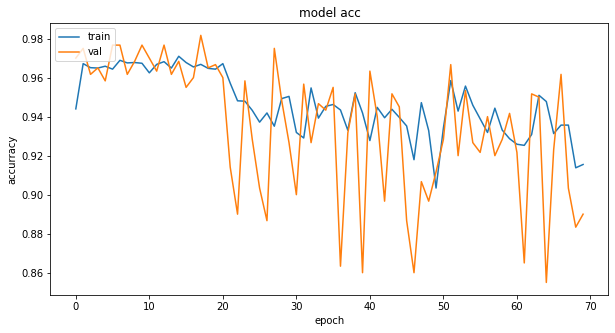

In [38]:
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model acc')
plt.ylabel('accurracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

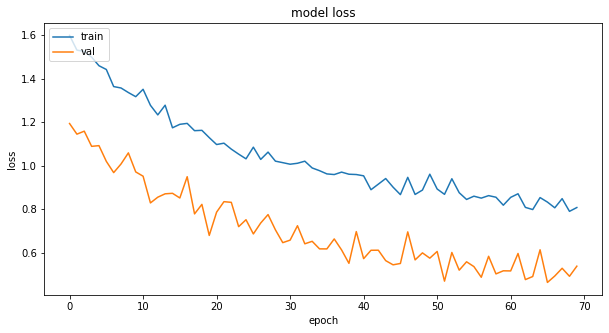

In [39]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [40]:
score = model.evaluate_generator(val_generator, steps=6, verbose=0)
print('val loss:', score[0]*100)
print('val accuracy:', score[1]*100)

val loss: 53.99011969566345
val accuracy: 88.99999856948853


In [41]:
model.save('CXR_model_4')

In [42]:
# serialize model to JSON
model_json = model.to_json()
with open("Cardiomegalycalssification_4.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("Cardiomegalycalssification_4.h5")
print("Saved model to disk")

Saved model to disk


In [43]:
true_labels = test_generator.classes
predictions = model.predict(test_generator,steps=len(test_generator), verbose=1)

23/23 [==============================] - 37s 2s/step


In [44]:
y_pred=predictions.argmax(axis=1)

In [45]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix


acc = accuracy_score(true_labels, np.round(y_pred))*100
cm = confusion_matrix(true_labels, np.round(y_pred))
tn, fp, fn, tp = cm.ravel()

print('CONFUSION MATRIX ------------------')
print(cm)

print('\nTEST METRICS ----------------------')
precision = tp/(tp+fp)*100
recall = tp/(tp+fn)*100
print('Accuracy: {}%'.format(acc))
print('Precision: {}%'.format(precision))
print('Recall: {}%'.format(recall))
print('F1-score: {}'.format(2*precision*recall/(precision+recall)))

print('\nTRAIN METRIC ----------------------')
print('Train acc: {}'.format(np.round((history.history['accuracy'][-1])*100, 2)))

CONFUSION MATRIX ------------------
[[1027  201]
 [ 509  560]]

TEST METRICS ----------------------
Accuracy: 69.09011754462342%
Precision: 73.58738501971091%
Recall: 52.38540692235735%
F1-score: 61.20218579234973

TRAIN METRIC ----------------------
Train acc: 91.55


In [47]:
from sklearn import metrics
from sklearn.metrics import roc_curve

In [48]:
fpr_keras, tpr_keras, thresholds_keras = roc_curve(true_labels, y_pred)

In [49]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

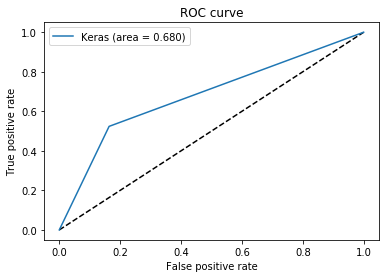

In [50]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
#plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()